In [2]:
!pip3 install wordcloud
!pip3 install matplotlib
!pip3 install spacy
# run in terminal: python3 -m spacy download en_core_web_sm

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

Import Libraries

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import spacy

OS

In [4]:
folder_path = 'LA-Audios' #SET FOLDER PATH
def get_file(file_path):

  with open(file_path, 'r') as file:
        text = file.read()
        words = text.split()
        return words

files = os.listdir(folder_path)

files

['http___planning.lacity.org_StaffRpt_Audios_West_2017_03-1....txt',
 'http___planning.lacity.org_StaffRpt_Audios_West_2017_11-1... (2).txt',
 'http___cityplanning.lacity.org_StaffRpt_Audios_Central_20... (30).txt',
 'http___planning.lacity.org_StaffRpt_Audios_West_2017_03-1... (2).txt',
 'http___cityplanning.lacity.org_StaffRpt_Audios_Central_20... (26).txt',
 'http___cityplanning.lacity.org_StaffRpt_Audios_Central_20... (4).txt',
 'http___cityplanning.lacity.org_StaffRpt_Audios_Central_20... (51).txt',
 'http___cityplanning.lacity.org_StaffRpt_Audios_Central_20... (47).txt',
 'http___cityplanning.lacity.org_StaffRpt_Audios_Central_20... (10).txt',
 'http___planning.lacity.org_StaffRpt_Audios_West_2017_12-2... (3).txt',
 'http___planning.lacity.org_StaffRpt_Audios_NorthValley_20....txt',
 'http___cityplanning.lacity.org_StaffRpt_Audios_Central_20... (8).txt',
 'http___cityplanning.lacity.org_StaffRpt_Audios_Central_20... (9).txt',
 'http___planning.lacity.org_StaffRpt_Audios_West_2017

Word HashMap

In [5]:
word_list = []
for file in files:
    file_word_list = get_file(folder_path + "/" + file)
    word_list.extend(file_word_list)

word_hash = {}
for word in word_list:
    if word not in word_hash:
        word_hash[word] = 1
    else:
        word_hash[word] += 1

word_hash

{'\ufeff[00:00:00.120]': 2,
 '-': 5705,
 'Speaker': 5706,
 '1': 2677,
 'So': 1945,
 'we': 3245,
 'will': 899,
 'now': 272,
 'move': 144,
 'on': 2718,
 'to': 12002,
 'the': 21141,
 'first': 286,
 'case.': 87,
 'Item': 31,
 'number': 460,
 'four': 340,
 'is': 5585,
 'ZA': 67,
 '2014': 18,
 '3184': 1,
 'CDP': 14,
 'Mel': 4,
 'SPp': 1,
 'one': 1049,
 'a': 7611,
 'CEQA': 3,
 'ENv': 1,
 '3183': 1,
 'CE': 3,
 'this': 3523,
 '519': 4,
 '521': 3,
 'East': 4,
 'Boccaccio': 3,
 'Avenue': 27,
 'and': 8070,
 "we'll": 145,
 'start': 113,
 'with': 2454,
 'department': 174,
 'report.': 65,
 '[00:00:23.250]': 1,
 '2': 1501,
 'Sorry,': 41,
 'staff': 317,
 'report': 155,
 'good': 213,
 'evening': 15,
 'commissioners.': 100,
 'My': 281,
 'name': 294,
 'Jason': 15,
 'Chan,': 9,
 'acting': 7,
 'behalf': 45,
 'of': 8511,
 'zoning': 252,
 'administrator': 74,
 'who': 343,
 'was': 2087,
 'initial': 46,
 'decision': 178,
 'maker': 15,
 'for': 3297,
 'case,': 139,
 'street': 329,
 'address': 169,
 'Picasso': 1,


Filtering

In [11]:
remove_list = [
    'the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'it', 'for',
    'not', 'on', 'with', 'he', 'as', 'you', 'do', 'at', 'this', 'but', 'his',
    'by', 'from', 'they', 'we', 'say', 'her', 'she', 'or', 'an', 'will', 'my',
    'one', 'all', 'would', 'there', 'their', 'what', 'so', 'up', 'out', 'if',
    'about', 'who', 'get', 'which', 'go', 'me', 'when', 'make', 'can', 'like',
    'time', 'no', 'just', 'him', 'know', 'take', 'into', 'your',
    'good', 'some', 'could', 'them', 'other', 'than', 'then', 'now',
    'only', 'come', 'its', 'over', 'think', 'also', 'back', 'after', 'use', 'two',
    'how', 'our', 'first', 'way', 'even', 'new', 'want', 'because',
    'any', 'these', 'day', 'us', 'I', 'Speaker', '-', 'is', 'And', 'So', 'I', 
    '1', 'was', 'are', '2', 'The', 'Thank', 'We', 'very', 'you'
    "I'm", 'going', "it's", "don't", 'you.', 'has', 'been', "that's",
    'But', 'were', 'This', "we're", "It's", '3',
    'those', 'had', 'see', 'that.', 'It', 'here', 'really',
    'Mr.', "I'm",  "there's", 'it.', 'three', 'If', '4', 'look',
    'You', 'did', "That's", 'through', 'part', 'should', "you're", "Commissioner"
]

for word in list(word_hash.keys()):
    if word in remove_list:
        del word_hash[word]

nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
for word in list(word_hash.keys()):
    if word in stop_words:
        del word_hash[word]

Word Frequency

In [12]:
#sort by freq
word_hash = dict(sorted(word_hash.items(), key=lambda x: x[1], reverse=True))

word_hash

{'project': 1002,
 'city': 547,
 'community': 507,
 'need': 483,
 'plan': 479,
 'people': 472,
 'Okay.': 465,
 'lot': 463,
 'number': 460,
 'building': 460,
 'parking': 406,
 'right': 404,
 'property': 404,
 'planning': 397,
 'applicant': 396,
 'residential': 390,
 'commission': 376,
 'site': 375,
 'housing': 350,
 'public': 342,
 'affordable': 338,
 'They': 333,
 "they're": 332,
 'Yes.': 332,
 'project.': 330,
 'street': 329,
 'appeal': 326,
 'staff': 317,
 'that,': 317,
 'units': 315,
 'kind': 306,
 'In': 305,
 'actually': 305,
 'That': 298,
 'Okay,': 291,
 'There': 290,
 'ask': 290,
 'area': 289,
 'development': 287,
 'neighborhood': 285,
 'My': 281,
 "I've": 280,
 'case': 278,
 'much.': 274,
 'here.': 270,
 'live': 265,
 'little': 262,
 'looking': 261,
 'you,': 255,
 'support': 254,
 '5': 253,
 'zoning': 252,
 'believe': 250,
 'All': 245,
 'design': 240,
 'sure': 234,
 'point': 232,
 'again,': 232,
 'wanted': 229,
 'there.': 227,
 'Good': 227,
 'council': 227,
 'What': 221,
 'findi

Visualization

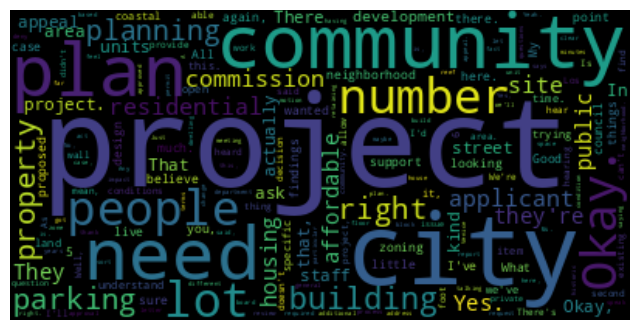

In [13]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(word_hash)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Words of Interest Filtering

In [9]:
words_of_interest = ['homelessness', 'displacement', 'traffic', 'parking',
                     'affordable', 'housing', 'zoning', 'development', 'gentrification', 
                     'community', 'sustainability', 'transit', 'safety', 'crime', 'schools', 
                     'education', 'environment', 'climate', 'infrastructure', 'budget', 'taxes', 
                     'businesses', 'jobs'
                     ]

filtered_word_hash = {word: freq for word, freq in word_hash.items() if word in words_of_interest}

filtered_word_hash

{'community': 507,
 'parking': 406,
 'housing': 350,
 'affordable': 338,
 'development': 287,
 'zoning': 252,
 'safety': 112,
 'traffic': 96,
 'jobs': 43,
 'displacement': 35,
 'transit': 34,
 'schools': 29,
 'businesses': 28,
 'environment': 22,
 'gentrification': 12,
 'budget': 10,
 'education': 8,
 'infrastructure': 8,
 'crime': 8,
 'homelessness': 7,
 'sustainability': 5,
 'taxes': 3,
 'climate': 2}

Visualization of Words of Interest

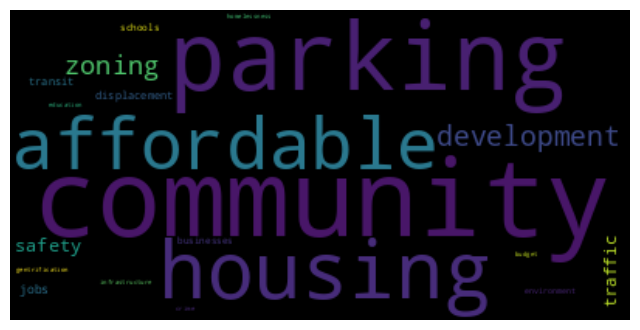

In [10]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(filtered_word_hash)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()